In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from layers import *

import numpy as np

device="cuda"

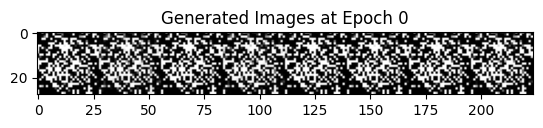

Epoch 1/100 - D Loss: 0.0278, G Loss: 5.6269
Epoch 2/100 - D Loss: 1.4744, G Loss: 2.1059
Epoch 3/100 - D Loss: 0.9179, G Loss: 1.3133
Epoch 4/100 - D Loss: 1.0753, G Loss: 3.1414
Epoch 5/100 - D Loss: 0.2906, G Loss: 3.3263
Epoch 6/100 - D Loss: 0.4820, G Loss: 2.6189
Epoch 7/100 - D Loss: 0.8266, G Loss: 5.6709
Epoch 8/100 - D Loss: 0.3645, G Loss: 4.8390
Epoch 9/100 - D Loss: 0.1523, G Loss: 5.3306
Epoch 10/100 - D Loss: 0.5840, G Loss: 4.3760


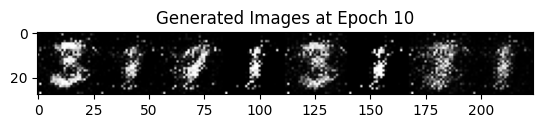

Epoch 11/100 - D Loss: 0.3794, G Loss: 3.2808
Epoch 12/100 - D Loss: 0.4079, G Loss: 3.0370
Epoch 13/100 - D Loss: 0.6972, G Loss: 2.3403
Epoch 14/100 - D Loss: 0.4045, G Loss: 3.0288
Epoch 15/100 - D Loss: 0.3940, G Loss: 3.1595
Epoch 16/100 - D Loss: 0.4214, G Loss: 3.2765
Epoch 17/100 - D Loss: 0.3236, G Loss: 4.5105
Epoch 18/100 - D Loss: 0.4156, G Loss: 3.3658
Epoch 19/100 - D Loss: 0.3150, G Loss: 3.8270
Epoch 20/100 - D Loss: 0.3887, G Loss: 2.7665
Epoch 21/100 - D Loss: 0.6555, G Loss: 2.4901
Epoch 22/100 - D Loss: 0.2051, G Loss: 3.5505
Epoch 23/100 - D Loss: 0.3569, G Loss: 2.4972
Epoch 24/100 - D Loss: 0.8829, G Loss: 1.6525
Epoch 25/100 - D Loss: 0.6097, G Loss: 2.6799
Epoch 26/100 - D Loss: 0.6863, G Loss: 2.3342
Epoch 27/100 - D Loss: 0.7677, G Loss: 3.4349
Epoch 28/100 - D Loss: 0.5950, G Loss: 2.2756
Epoch 29/100 - D Loss: 0.8948, G Loss: 1.8777
Epoch 30/100 - D Loss: 0.8210, G Loss: 1.9187
Epoch 31/100 - D Loss: 0.6576, G Loss: 1.9964
Epoch 32/100 - D Loss: 0.8921, G L

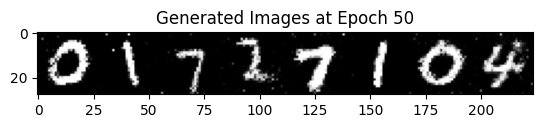

Epoch 51/100 - D Loss: 0.9419, G Loss: 1.9274
Epoch 52/100 - D Loss: 0.7484, G Loss: 1.6069
Epoch 53/100 - D Loss: 1.0522, G Loss: 1.6470
Epoch 54/100 - D Loss: 1.5774, G Loss: 1.1273
Epoch 55/100 - D Loss: 1.2101, G Loss: 1.3545
Epoch 56/100 - D Loss: 0.7856, G Loss: 1.6986
Epoch 57/100 - D Loss: 1.4382, G Loss: 1.2430
Epoch 58/100 - D Loss: 1.0750, G Loss: 1.2241
Epoch 59/100 - D Loss: 0.8902, G Loss: 1.6160
Epoch 60/100 - D Loss: 1.2039, G Loss: 1.3680
Epoch 61/100 - D Loss: 0.7379, G Loss: 1.6375
Epoch 62/100 - D Loss: 0.8849, G Loss: 1.7085
Epoch 63/100 - D Loss: 1.0200, G Loss: 1.3191
Epoch 64/100 - D Loss: 1.3570, G Loss: 1.1104
Epoch 65/100 - D Loss: 0.9825, G Loss: 1.3034
Epoch 66/100 - D Loss: 1.0594, G Loss: 1.5596
Epoch 67/100 - D Loss: 1.0148, G Loss: 1.1810
Epoch 68/100 - D Loss: 0.8846, G Loss: 1.4983
Epoch 69/100 - D Loss: 1.0892, G Loss: 1.2099
Epoch 70/100 - D Loss: 1.4740, G Loss: 1.0817
Epoch 71/100 - D Loss: 0.8274, G Loss: 1.5938
Epoch 72/100 - D Loss: 0.8079, G L

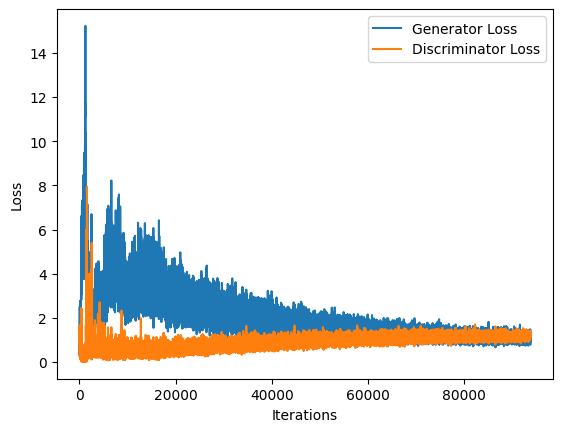

In [2]:
# ----------------------- GAN on MNIST --------------------------------


latent_dim = 100
epochs_to_visualize = [0, 10, 50, 100]
fixed_z = torch.randn(10, latent_dim, device=device)

# Initialize networks
generator = Generator(latent_dim)
discriminator = Discriminator()

generator.to(device)
discriminator.to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

# Load MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
train_loader = DataLoader(datasets.MNIST(root='data', train=True, transform=transform, download=True), batch_size=64, shuffle=True)

# Training Loop
num_epochs = 100
G_losses, D_losses = [], []
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):
        # Prepare real and fake labels
        real_labels = torch.ones(imgs.size(0), 1).to(device)
        fake_labels = torch.zeros(imgs.size(0), 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_outputs = discriminator(imgs.to(device))
        real_loss = criterion(real_outputs, real_labels)

        z = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = generator(z)
        fake_outputs = discriminator(fake_imgs.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        D_loss = real_loss + fake_loss
        D_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        outputs = discriminator(fake_imgs)
        G_loss = criterion(outputs, real_labels)
        G_loss.backward()
        optimizer_G.step()

        # Store losses
        G_losses.append(G_loss.item())
        D_losses.append(D_loss.item())

    
    if epoch in epochs_to_visualize:
        with torch.no_grad():
            generated_images = generator(fixed_z).cpu().detach()
            grid = np.concatenate([generated_images[i].detach().numpy().squeeze() for i in range(8)], axis=1)
            np.save(f"images_epoch_{epoch}.npy", grid)
            plt.imshow(grid, cmap="gray")
            plt.title(f"Generated Images at Epoch {epoch}")
            plt.show()


    print(f"Epoch {epoch+1}/{num_epochs} - D Loss: {D_loss.item():.4f}, G Loss: {G_loss.item():.4f}")

# Plotting loss curves
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99998695..1.0].


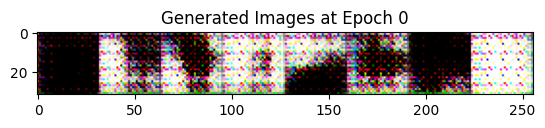

Epoch 1/100 - D Loss: 0.0045, G Loss: 7.7109
Epoch 2/100 - D Loss: 0.0364, G Loss: 9.0562
Epoch 3/100 - D Loss: 0.0326, G Loss: 9.9326
Epoch 4/100 - D Loss: 0.0205, G Loss: 11.1704
Epoch 5/100 - D Loss: 0.0108, G Loss: 9.1694
Epoch 6/100 - D Loss: 0.3291, G Loss: 6.0704
Epoch 7/100 - D Loss: 0.0630, G Loss: 5.8657
Epoch 8/100 - D Loss: 0.3884, G Loss: 7.7005
Epoch 9/100 - D Loss: 0.0718, G Loss: 4.6403
Epoch 10/100 - D Loss: 0.0232, G Loss: 9.6003


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999999..1.0].


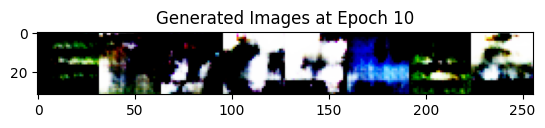

Epoch 11/100 - D Loss: 0.0051, G Loss: 10.3051
Epoch 12/100 - D Loss: 0.5918, G Loss: 4.6012
Epoch 13/100 - D Loss: 0.0442, G Loss: 7.2120
Epoch 14/100 - D Loss: 0.0776, G Loss: 4.6977
Epoch 15/100 - D Loss: 0.0369, G Loss: 6.4745
Epoch 16/100 - D Loss: 0.0942, G Loss: 3.5122
Epoch 17/100 - D Loss: 0.0242, G Loss: 9.7481
Epoch 18/100 - D Loss: 0.0611, G Loss: 9.6118
Epoch 19/100 - D Loss: 1.0519, G Loss: 5.3232
Epoch 20/100 - D Loss: 0.4695, G Loss: 5.4921
Epoch 21/100 - D Loss: 0.3826, G Loss: 4.9344
Epoch 22/100 - D Loss: 0.1964, G Loss: 7.6106
Epoch 23/100 - D Loss: 0.0490, G Loss: 5.1735
Epoch 24/100 - D Loss: 1.1631, G Loss: 3.4781
Epoch 25/100 - D Loss: 0.0483, G Loss: 4.6559
Epoch 26/100 - D Loss: 0.1042, G Loss: 4.4078
Epoch 27/100 - D Loss: 0.3250, G Loss: 4.1416
Epoch 28/100 - D Loss: 0.8314, G Loss: 3.3998
Epoch 29/100 - D Loss: 0.2313, G Loss: 8.7467
Epoch 30/100 - D Loss: 0.2325, G Loss: 5.6120
Epoch 31/100 - D Loss: 1.0972, G Loss: 4.8803
Epoch 32/100 - D Loss: 0.0515, G 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


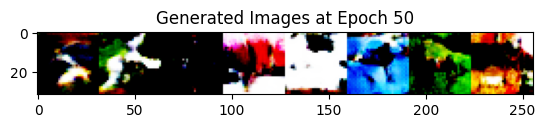

Epoch 51/100 - D Loss: 0.6772, G Loss: 1.7505
Epoch 52/100 - D Loss: 0.1000, G Loss: 4.2221
Epoch 53/100 - D Loss: 0.1495, G Loss: 2.9925
Epoch 54/100 - D Loss: 0.0333, G Loss: 5.6227
Epoch 55/100 - D Loss: 0.2438, G Loss: 5.4483
Epoch 56/100 - D Loss: 0.6410, G Loss: 1.7839
Epoch 57/100 - D Loss: 0.0710, G Loss: 5.1220
Epoch 58/100 - D Loss: 0.0102, G Loss: 10.5648
Epoch 59/100 - D Loss: 0.2353, G Loss: 6.8089
Epoch 60/100 - D Loss: 0.0735, G Loss: 5.2983
Epoch 61/100 - D Loss: 0.1674, G Loss: 4.9001
Epoch 62/100 - D Loss: 0.1047, G Loss: 4.1843
Epoch 63/100 - D Loss: 0.1510, G Loss: 5.5547
Epoch 64/100 - D Loss: 0.2189, G Loss: 3.4173
Epoch 65/100 - D Loss: 0.0084, G Loss: 8.5763
Epoch 66/100 - D Loss: 0.9492, G Loss: 5.0075
Epoch 67/100 - D Loss: 0.0322, G Loss: 6.8124
Epoch 68/100 - D Loss: 0.0523, G Loss: 4.0012
Epoch 69/100 - D Loss: 0.8243, G Loss: 9.2363
Epoch 70/100 - D Loss: 0.1318, G Loss: 8.8742
Epoch 71/100 - D Loss: 0.1896, G Loss: 6.2702
Epoch 72/100 - D Loss: 0.5271, G 

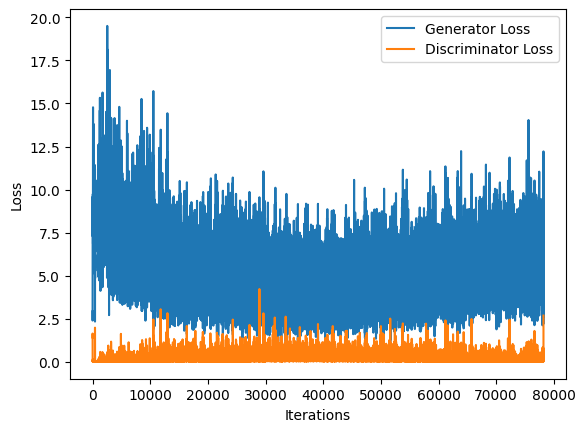

In [5]:
# ----------------------- DCGAN on CIFAR10 --------------------------------


device="cuda"
latent_dim = 100
epochs_to_visualize = [0, 10, 50, 100]
fixed_z = torch.randn(10, latent_dim, 1, 1, device=device)

# Initialize networks
generator = DCGAN_Generator(latent_dim)
discriminator = DCGAN_Discriminator()

generator.to(device)
discriminator.to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

# Load MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
train_loader = DataLoader(datasets.CIFAR10(root='data', train=True, transform=transform, download=True), batch_size=64, shuffle=True)

# Training Loop
num_epochs = 100
G_losses, D_losses = [], []
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_labels = torch.ones(imgs.size(0), 1).to(device)
        fake_labels = torch.zeros(imgs.size(0), 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_outputs = discriminator(imgs.to(device))
        real_loss = criterion(real_outputs, real_labels)

        z = torch.randn(imgs.size(0), latent_dim,1,1).to(device)
        fake_imgs = generator(z)
        fake_outputs = discriminator(fake_imgs.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        D_loss = real_loss + fake_loss
        D_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        outputs = discriminator(fake_imgs)
        G_loss = criterion(outputs, real_labels)
        G_loss.backward()
        optimizer_G.step()

        # Store losses
        G_losses.append(G_loss.item())
        D_losses.append(D_loss.item())

    
    if epoch in epochs_to_visualize:
        with torch.no_grad():
            generated_images = generator(fixed_z).cpu().detach().permute(0,2,3,1)
            grid = np.concatenate([generated_images[i].detach().numpy().squeeze() for i in range(8)], axis=1)
            np.save(f"images_CIFAR_epoch_{epoch}.npy", grid)
            plt.imshow(grid, cmap="gray")
            plt.title(f"Generated Images at Epoch {epoch}")
            plt.show()


    print(f"Epoch {epoch+1}/{num_epochs} - D Loss: {D_loss.item():.4f}, G Loss: {G_loss.item():.4f}")

# Plotting loss curves
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


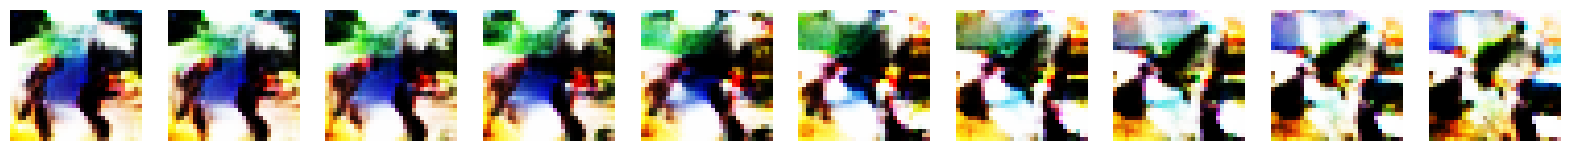

In [10]:
def interpolate(latent_dim, generator, steps=10):
    z_start = torch.randn(1, latent_dim, 1, 1)
    z_end = torch.randn(1, latent_dim, 1, 1)
    interpolated_images = []

    for alpha in torch.linspace(0, 1, steps):
        z = ((1 - alpha) * z_start + alpha * z_end).to(device)
        with torch.no_grad():
            img = generator(z)
        interpolated_images.append(img.squeeze(0).cpu().detach().numpy())

    return interpolated_images

# Visualization of interpolated images
interpolated_images = interpolate(latent_dim, generator)
plt.figure(figsize=(20, 5))
for i, img in enumerate(interpolated_images):
    plt.subplot(1, len(interpolated_images), i + 1)
    plt.imshow(img.transpose(1, 2, 0) * 0.5 + 0.5)
    plt.axis("off")
plt.show()